## Virtual Environment for Individual-Based Modeling

### Advanced Project I

Created on March 31, 2019 by Ralph Florent <r.florent@jacobs-university.de>

#### Description
WIP...

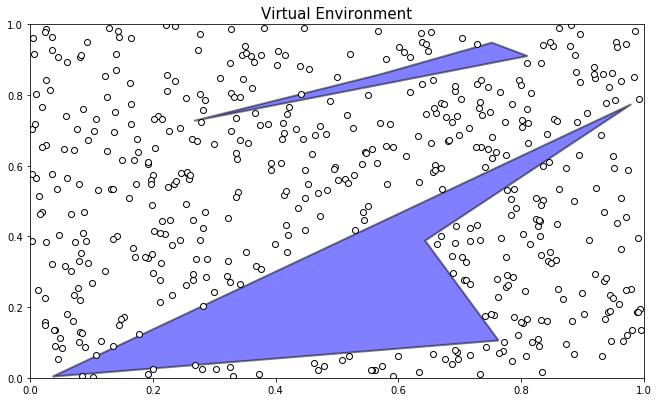

In [7]:
""" Individual-Based Modeling """

# -*- coding: utf-8 -*-
# 
# Created on March 31, 2019
# Authors: 
#        Ralph Florent <r.florent@jacobs-university.de>

### START: scripts

# Import relevant libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

from matplotlib.path import Path
import matplotlib.patches as Patches

# Number of patches
TOTAL_PATCHES = 2
TOTAL_AGENTS = 500


def create_patches(n=TOTAL_PATCHES, allow_overlap=True):
    """ Create a set of patches within a specific area 
    ref: #https://matplotlib.org/users/path_tutorial.html
    """
    global patches 
    patches = []
    
    for i in range(n):
        points = np.random.rand(4, 2) # 4 random points
        verts = [tuple(p) for p in points]
        verts.append(verts[0]) # closed term

        # rect = [
        #    [0.2, 0.2], # left, bottom
        #    [0.2, 0.4], # left, top
        #    [0.4, 0.4], # right, top
        #    [0.4, 0.2], # right, bottom
        #    [0.2, 0.4], # ignored
        #]

        codes = [
            Path.MOVETO, # start here
            Path.LINETO, # draw lines
            Path.LINETO, # ~
            Path.LINETO, # draw lines
            Path.CLOSEPOLY,# finish here
        ]

        path = Path(verts, codes)
        patch = Patches.PathPatch(path, facecolor='b', alpha=0.5, lw=2)
        patches.append(patch)
    
    return patches

def is_in_patch(patch, point=()):
    """ Check if a point belongs to a specific area (or patch)"""
    path = patch.get_path()
    return path.contains_point(point)


def gen_random_point():
    global patches
    # initialize random point(x, y)
    x, y = np.random.rand(2) # [0-1, 0-1]
        
    while True:
        found = False
        for p in patches:
            if is_in_patch(p, (x, y)):
                found = True
        
        if not found: break # ice breaker
        
        # update point(x, y)
        x, y = np.random.rand(2)
            
    return (x, y)

# On-the-fly agent definition
class Agent:
    pass

# create agents
def create_agents():
    global agents
    agents = []
    
    for i in range(TOTAL_AGENTS):
        agent = Agent()
        x, y = gen_random_point() # that is not in patch
        agent.x = x
        agent.y = y
        agents.append(agent) # append (i.e. add) the ith agent into the array ’agents’
    return agents

        
def plot_figure():
    """ Create and plot figure """
    global patches
    global agents
   
    fig = plt.figure(figsize=(11, 6.5))
    ax  = fig.add_subplot(111)
    
    for p in patches:
        ax.add_patch(p)
    
    ax.plot([ag.x for ag in agents], [ag.y for ag in agents], 'o', mfc='w', mec='k')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    plt.title('Virtual Environment', fontsize=15)
    plt.show()
    
    return ax


# Run test app
create_patches()
create_agents()
plot_figure()
### END: scripts